In [1]:
%load_ext autoreload
%autoreload 2

import ncem

datadir = ""

In [2]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_path=datadir + '10xvisium/',
    data_origin='10xvisium',
    radius=0,
    n_rings=1,
    node_label_space_id='type',
    node_feature_space_id='standard',
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])


Loading data from raw files
registering celldata
collecting image-wise celldata
adding graph-level covariates


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.42it/s]

Loaded 1 images with complete data from 1 patients over 2688 cells with 4000 cell features and 15 distinct celltypes.
(2688, 15)
node_types
h_0 15
h_1 4000
Mean of mean node degree per images across images: 0.000000

 Celldata metadata: {'lateral_resolution': 1.0, 'fn': 'visium_hne_adata.h5ad', 'image_col': 'in_tissue', 'cluster_col': 'cluster', 'cluster_col_preprocessed': 'cluster_preprocessed', 'patient_col': 'in_tissue', 'n_top_genes': None}


/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cluster' as categorical
/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'cluster_preprocessed' as categorical


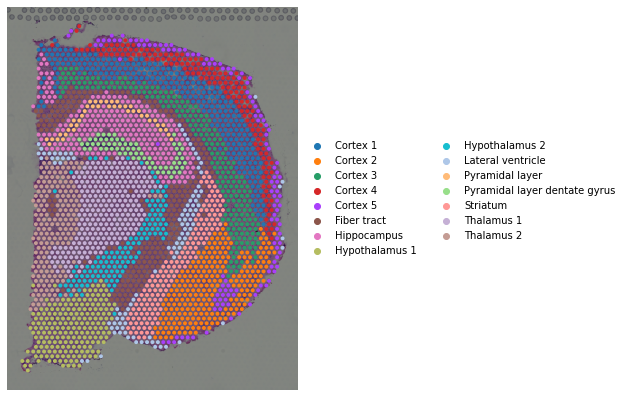

In [3]:
adata = interpreter.data.spatial(
    image_key= "1",
    spot_size=100,
    figsize=(8,8),
)

  0%|                                                                                                                       | 0/1 [00:00<?, ?it/s]/home/icb/anna.schaar/miniconda3/envs/ncem/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.63s/it]


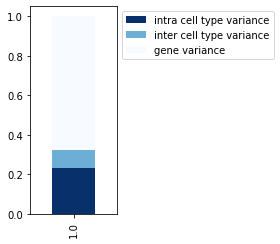

In [5]:
var_decomp = interpreter.data.compute_variance_decomposition()
interpreter.data.variance_decomposition(
    var_decomp, figsize=(4.,3.5)
)

In [6]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.234381
inter cell type variance    0.088433
gene variance               0.677186
dtype: float32

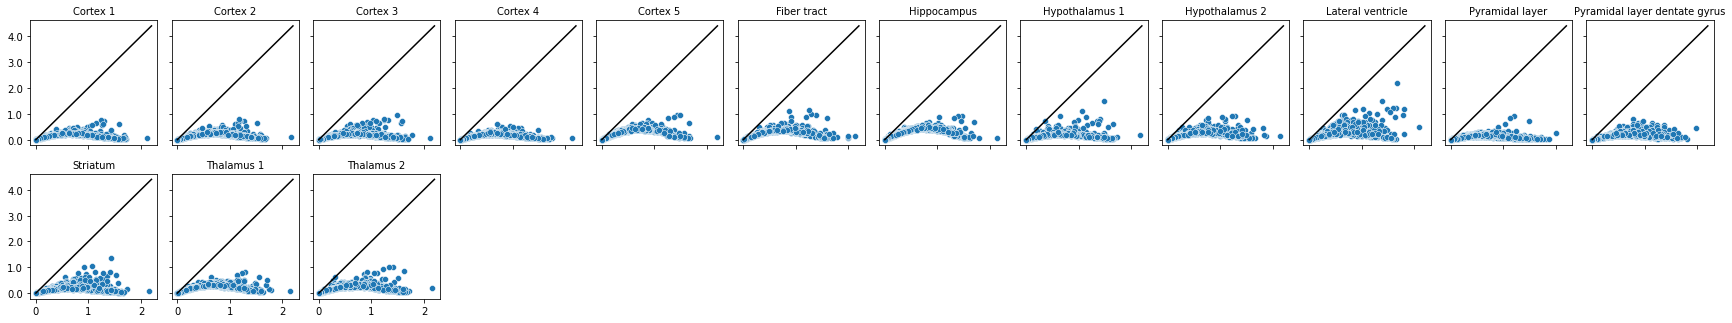

In [7]:
interpreter.data.noise_structure(min_x=0.0, max_x=2.2)